In [1]:
import socket
import sys
import tqdm
import re

In [2]:
sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
sock.connect(('192.168.86.51', 4242))

In [3]:
# val = sock.recv(1024).decode('utf-8')
# # print(val)
# # print("---")
# # val = val[val.find('('):]
# for line in re.findall(r"\((.*)\)", val):
#     print(line.split(',')[2])

In [4]:
with open('test.csv', 'w') as f:
    tot = 0
    for i in tqdm.tqdm(range(500)):
        data = sock.recv(4096)

        f.write(data.decode('utf-8'))
        tot += len(data)

print(tot)

100%|██████████| 500/500 [00:06<00:00, 81.18it/s]


37323


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('test.csv', header=None)
df = df.rename({1: 'Timestamp', 2: 'ADC0'}, axis=1)[['Timestamp', 'ADC0']]
df

,Timestamp,ADC0
0,12118905,0.555103)
1,12123924,0.561548)
2,12128943,0.551074)
3,12133956,0.551880)
4,12138969,0.560742)
...,...,...
1282,18548012,0.554297)
1283,18553024,0.552686)
1284,18558045,0.551074)
1285,18563077,0.543018)


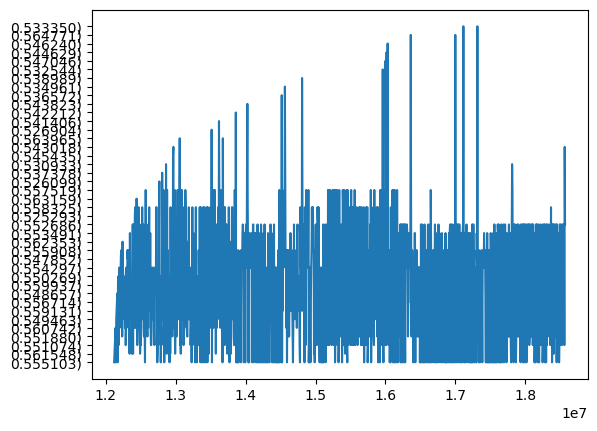

In [7]:
plt.plot(df['Timestamp'], df['ADC0'])